## Image Classification Using CNNs

## About the Dataset

### Context
This dataset consists of image data depicting **Natural Scenes** from around the world. It was originally made available by Intel for an Image Classification Challenge on [Analytics Vidhya](https://datahack.analyticsvidhya.com).

### Content
- The dataset contains **25,000 images** with a resolution of **150x150 pixels**, categorized into 6 distinct classes:
  - `buildings` (Label: 0)
  - `forest` (Label: 1)
  - `glacier` (Label: 2)
  - `mountain` (Label: 3)
  - `sea` (Label: 4)
  - `street` (Label: 5)

### Data Split
- **Training Set:** ~14,000 images
- **Test Set:** ~3,000 images
- **Prediction Set:** ~7,000 images


## Importing Necessary Libraries

In [1]:
import pandas as pd 
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

## Defining Class Names and Basic Parameters

In this section, we define key elements for the classification task:

- **class_names**: A list of the six categories (or classes) of images in the dataset:
  - `mountain`
  - `street`
  - `glacier`
  - `buildings`
  - `sea`
  - `forest`
  
- **class_names_label**: A dictionary that maps each class name to a corresponding numerical label using Python's `enumerate()` function. This mapping is essential for the classification model to interpret categorical labels.

- **nb_classes**: The total number of classes (6 in this case), which will be used to configure the neural network for multi-class classification.

- **IMAGE_SIZE**: This defines the resolution of the input images, which is set to **150x150 pixels**. All images will be resized to this resolution for consistency in model input.

These definitions establish the groundwork for labeling the data and ensuring uniform image input for the model.

In [9]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

## Loading the Dataset

The following function, `load_data()`, is designed to load the image data for training and evaluation. It performs the following key tasks:

- **Loading Images**: The function reads images from the specified training and test directories, which are defined in the `datasets` list.
  
- **Iterating Through Categories**: It loops through each category folder, retrieving the corresponding label using the `class_names_label` mapping. 

- **Image Preprocessing**: For each image:
  - The image is read using OpenCV (`cv2.imread()`).
  - It is converted from BGR (OpenCV's default color format) to RGB.
  - Each image is resized to the predefined dimensions of **150x150 pixels** using `cv2.resize()`.

- **Storing Data**: The processed images and their corresponding labels are stored in lists and converted to NumPy arrays for efficient handling. 

- **Output**: The function returns a tuple containing the loaded images and labels for both the training and test datasets, allowing for easy access during model training and evaluation.

This structured approach ensures that the data is properly formatted and ready for use in training the image classification model.

In [11]:
def load_data():
    """
        Load the data:
            - 14,034 images to train the network.
            - 3,000 images to evaluate how accurately the network learned to classify images.
    """
    
    datasets = [r'C:\Users\Aksha\Desktop\Projects\Image Detection\seg_train', r'C:\Users\Aksha\Desktop\Projects\Image Detection\seg_test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [15]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading C:\Users\Aksha\Desktop\Projects\Image Detection\seg_train


100%|█████████████████████████████████████████████████████████████████████████████| 2382/2382 [00:14<00:00, 159.11it/s]


Loading C:\Users\Aksha\Desktop\Projects\Image Detection\seg_test


100%|███████████████████████████████████████████████████████████████████████████████| 501/501 [00:03<00:00, 153.54it/s]


## Shuffling the Training Data

To ensure that the model learns effectively and avoids any potential bias during training, we shuffle the training images and their corresponding labels. The line of code below utilizes the `shuffle` function from `sklearn.utils`, with a specified random seed (`random_state=25`) to maintain consistency across runs.

This random shuffling helps in:
- Breaking any inherent order in the data, which could lead to overfitting.
- Providing a more diverse set of samples in each training batch, ultimately improving the model's generalization capabilities.

```python
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)


In [17]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

## Exploratory Data Analysis (EDA)

In this section, we will conduct an Exploratory Data Analysis (EDA) to gain insights into the dataset. EDA is a crucial step in understanding the underlying patterns, distributions, and potential issues within the data. 

Key objectives of this EDA include:

- **Visualizing Class Distribution**: We will analyze how the images are distributed across the different categories to identify any imbalances that may affect model training.

- **Examining Sample Images**: We will display a few sample images from each category to get a visual sense of the data.


Through this analysis, we aim to better understand the dataset's characteristics and prepare for the subsequent steps in the modeling process.

In [18]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 14034
Number of testing examples: 3000
Each image is of size: (150, 150)


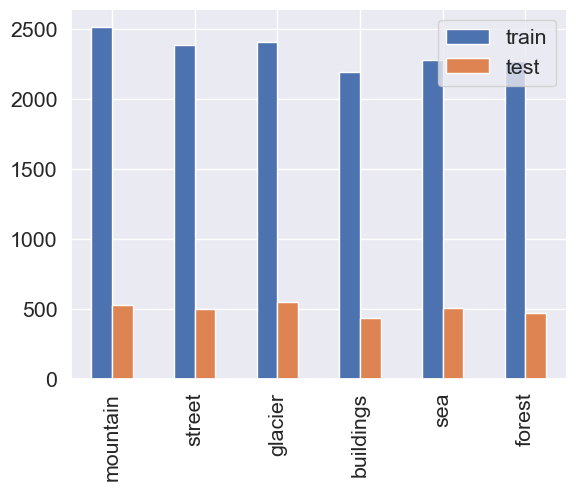

In [19]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

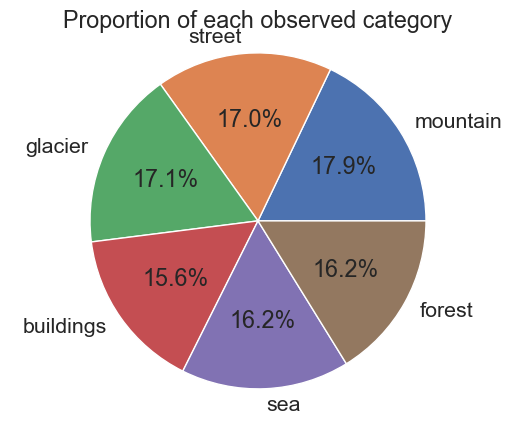

In [20]:
plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [21]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [22]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

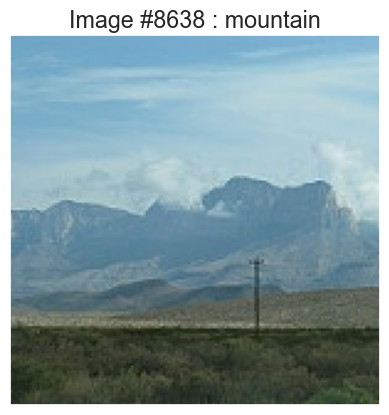

In [23]:
display_random_image(class_names, train_images, train_labels)

In [28]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

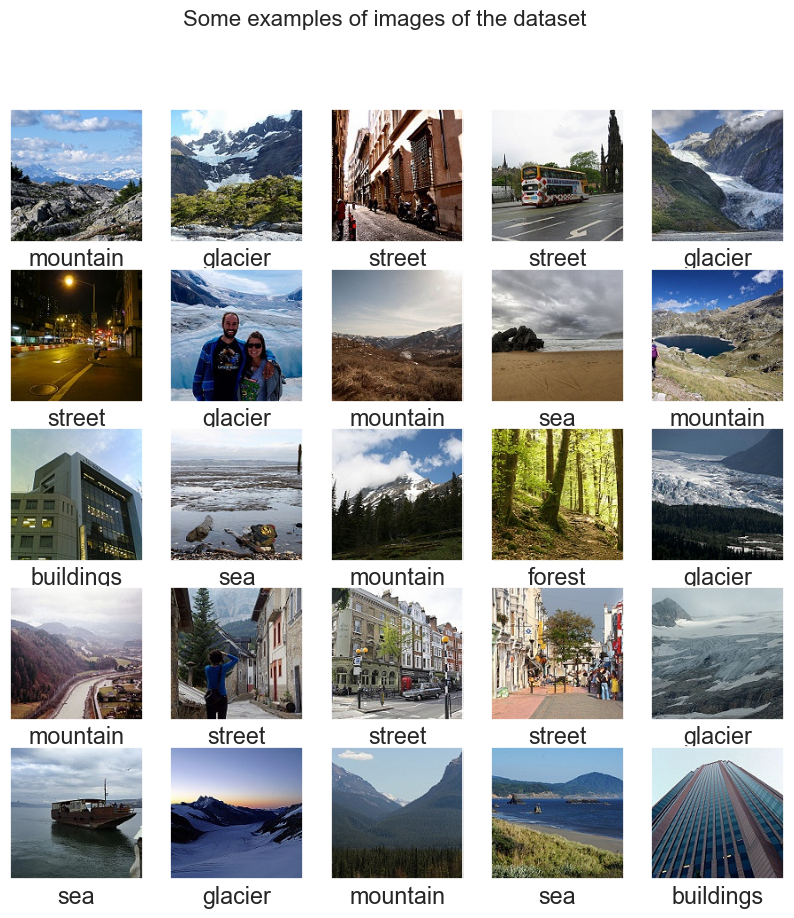

In [29]:
display_examples(class_names, train_images, train_labels)

# Model Building

## Building the Convolutional Neural Network (CNN) Model

In this section, we define a Convolutional Neural Network (CNN) model using TensorFlow's Keras API. CNNs are particularly effective for image classification tasks due to their ability to automatically learn spatial hierarchies of features from the input images.

The model architecture is structured as follows:

1. **Input Layer**: 
   - The input shape is defined as **(150, 150, 3)**, corresponding to the height, width, and color channels (RGB) of the images.

2. **Convolutional Layers**: 
   - The first layer is a **Conv2D** layer with **32 filters** and a kernel size of **(3, 3)**, using ReLU (Rectified Linear Unit) as the activation function. This layer will learn local patterns in the images.
   - This is followed by a **MaxPooling2D** layer with a pool size of **(2, 2)**, which reduces the spatial dimensions, helping to retain the most important features while reducing computational load.

   - The second convolutional layer has the same configuration as the first, allowing the model to learn more complex features.

3. **Flattening Layer**: 
   - The **Flatten** layer converts the 2D matrix from the last convolutional layer into a 1D vector, which can be fed into the fully connected layers.

4. **Fully Connected Layers**: 
   - A **Dense** layer with **128 units** and ReLU activation is added, which will learn to combine the features extracted by the convolutional layers.
   - The final output layer is also a **Dense** layer with **6 units** (one for each class) and a **softmax** activation function, which will provide a probability distribution over the classes.

This model is designed to learn from the training data and classify images into one of the six predefined categories.


In [38]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(150, 150, 3)), 
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

## Compiling the Model

Before training the model, we need to compile it. This step involves configuring the model with specific parameters that determine how it will learn. The following settings are defined:

- **Optimizer**: 
  - We use the **Adam optimizer**, which is an adaptive learning rate optimization algorithm. It combines the advantages of two other extensions of stochastic gradient descent: AdaGrad and RMSProp. Adam is effective in handling sparse gradients and is known for its efficiency and performance in training deep learning models.

- **Loss Function**: 
  - The **sparse categorical crossentropy** loss function is used for multi-class classification problems where the target labels are integers. It measures the difference between the predicted class probabilities and the actual class labels, allowing the model to learn effectively from its mistakes.

- **Metrics**: 
  - We specify **accuracy** as a metric to monitor the performance of the model during training and evaluation. This metric provides insights into how well the model is performing on the classification task.

By compiling the model with these parameters, we prepare it for the training process, enabling it to learn from the training data and optimize its predictions over time.


In [40]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

## Training the Model

In this section, we initiate the training process for our Convolutional Neural Network (CNN) using the `fit` method. The training process involves adjusting the model's weights based on the training data to minimize the loss function and improve accuracy. The key parameters used in this training process are:

- **Training Data**: 
  - The model is trained using the `train_images` and `train_labels`, which contain the images and their corresponding labels.

- **Batch Size**: 
  - We set the `batch_size` to **128**, meaning the model will update its weights after processing 128 images. This helps to balance memory efficiency and training speed.

- **Epochs**: 
  - The model will go through the training dataset **20 times** (epochs). Each epoch consists of a complete pass over the training data, allowing the model to learn from the entire dataset multiple times.

- **Validation Split**: 
  - We specify a `validation_split` of **0.2**, which means that **20%** of the training data will be reserved for validation. This split allows us to monitor the model's performance on unseen data during training, helping to identify any overfitting.

The `fit` method returns a history object containing metrics such as loss and accuracy for both the training and validation datasets over the epochs. This information is crucial for evaluating the model's performance and determining if further tuning is required.


In [42]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split = 0.2)

Epoch 1/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 32s 311ms/step - accuracy: 0.4153 - loss: 1.9220 - val_accuracy: 0.6352 - val_loss: 0.9372
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 20s 230ms/step - accuracy: 0.6979 - loss: 0.8051 - val_accuracy: 0.7211 - val_loss: 0.7605
Epoch 3/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 22s 247ms/step - accuracy: 0.7652 - loss: 0.6483 - val_accuracy: 0.7456 - val_loss: 0.6962
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 22s 248ms/step - accuracy: 0.8207 - loss: 0.4902 - val_accuracy: 0.7403 - val_loss: 0.7168
Epoch 5/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 22s 246ms/step - accuracy: 0.8637 - loss: 0.3786 - val_accuracy: 0.7649 - val_loss: 0.6828
Epoch 6/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 22s 248ms/step - accuracy: 0.9144 - loss: 0.2719 - val_accuracy: 0.7488 - val_loss: 0.7501
Epoch 7/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 22s 248ms/step - accuracy: 0.9355 - loss: 0.2008 - val_accuracy: 0.7499 - val_loss: 0.8322
Epoch 8/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 22s 246ms/step - accuracy: 0.9531 - loss: 0.1564 - val_accu

## Visualizing Model Performance

To evaluate the performance of our trained model, we define a function `plot_accuracy_loss(history)`, which visualizes both the accuracy and loss over the training epochs. This visualization helps us understand how well the model is learning and whether it is generalizing well to unseen data.

### Function Overview

- **Purpose**: 
  - The function plots two sets of graphs: one for training and validation accuracy and another for training and validation loss. 

### Key Components

1. **Accuracy Plot**:
   - The first subplot displays the training accuracy and validation accuracy across epochs. 
   - We use blue circles (`'bo--'`) for training accuracy and red circles (`'ro--'`) for validation accuracy.
   - This plot allows us to observe the model's performance on both training and validation datasets, indicating how well the model is learning.

2. **Loss Plot**:
   - The second subplot visualizes the training loss and validation loss over the same epochs.
   - Similar to the accuracy plot, blue circles represent the training loss and red circles represent the validation loss.
   - This plot helps us identify potential issues, such as overfitting or underfitting, by comparing the loss trends of both datasets.

3. **Visualization**:
   - Both plots are displayed using `plt.show()`, providing an immediate visual representation of the model's learning process.

By analyzing these plots, we can gain insights into the model's training dynamics and make informed decisions about further tuning or adjustments to improve its performance.


In [52]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'], 'bo--', label="accuracy")  # Updated key
    plt.plot(history.history['val_accuracy'], 'ro--', label="val_accuracy")  # Updated key
    plt.title("Train Accuracy vs Validation Accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'], 'bo--', label="loss")
    plt.plot(history.history['val_loss'], 'ro--', label="val_loss")
    plt.title("Train Loss vs Validation Loss")
    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    plt.legend()
    
    plt.show()

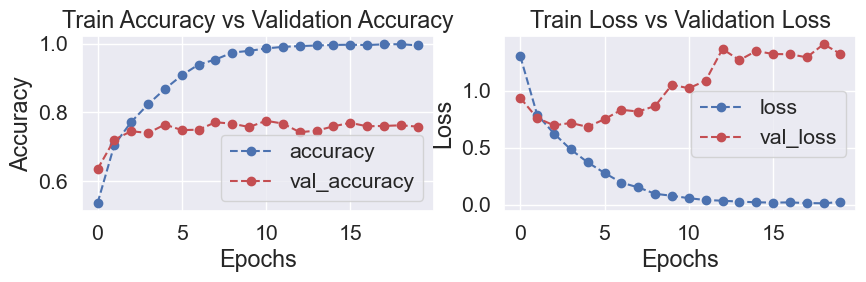

In [54]:
plot_accuracy_loss(history)

In [56]:
test_loss = model.evaluate(test_images, test_labels)

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7049 - loss: 1.8147


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step


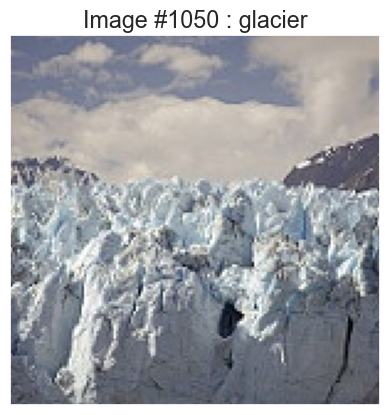

In [57]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(class_names, test_images, pred_labels)

## Identifying Mislabeled Images

To assess the performance of our image classification model, we define the function `print_mislabeled_images(class_names, test_images, test_labels, pred_labels)`. This function helps us identify and visualize examples where the classifier made incorrect predictions.

### Function Overview

- **Purpose**: 
  - The function prints 25 examples of images that were mislabeled by the classifier, specifically when the true labels (`test_labels`) do not match the predicted labels (`pred_labels`).

### Key Components

1. **Mislabeled Image Identification**:
   - We create a boolean array `BOO`, which checks for equality between the actual labels and predicted labels.
   - Using `np.where(BOO == 0)`, we find the indices of images where the predictions do not match the aeas for improvement.

### Importance

By examining mislabeled images, we can gain insights into the model's weaknesses and make necessary adjustments, such as refining the training data, modifying the model architecture, or tweaking hyperparameters. This process ultimately leads to a more robust and accurate classifier.


In [58]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels)

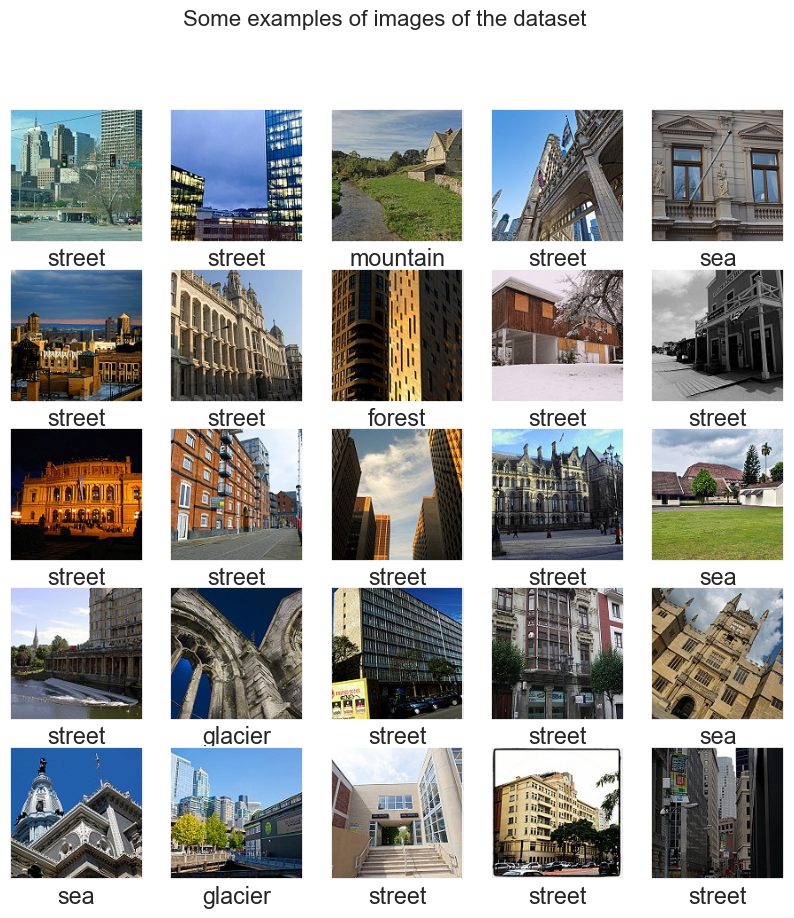

In [59]:
print_mislabeled_images(class_names, test_images, test_labels, pred_labels)

## Confusion Matrix Visualization

To evaluate the performance of our image classification model more rigorously, we compute and visualize the **confusion matrix** using the `confusion_matrix` function from `sklearn.metrics`. The confusion matrix provides a detailed breakdown of the model's predictions versus the actual labelse Confusion Matrix

The resulting confusion matrix for our model is as follows:



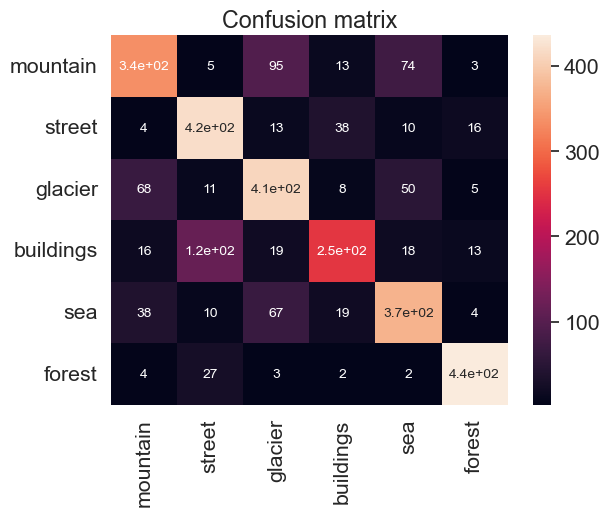

In [60]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()


### Key Observations:
- **High Accuracy**: The diagonal elements indicate high accuracy in classifying most categories, particularly for 'street' and 'forest.'
- **Common Misclassifications**: 
  - 'Mountain' is often misclassified as 'glacier' and 'sea.'
  - 'Street' frequently gets confused with 'buildings.'
- This matrix highlights areas where the model can improve, suggesting a need for more distinct features between similar categories.
tecture.
